In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (20, 12)

In [3]:
df = pd.read_csv('IoU.csv')

In [4]:
df_z = df.loc[df['IoU'] == 0]
df_nz = df.loc[df['IoU'] != 0]

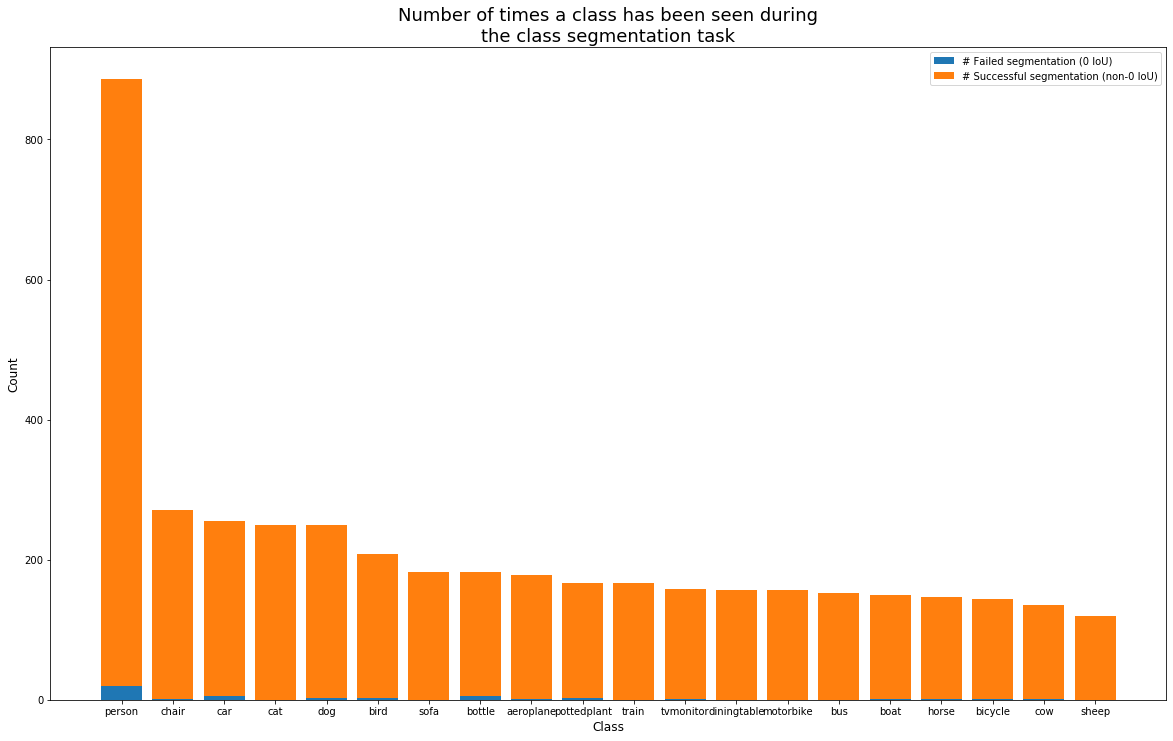

In [5]:
count_z = df_z.groupby(['Class']).size().reset_index(name='Count_z').set_index('Class')
count_nz = df_nz.groupby(['Class']).size().reset_index(name='Count_nz').set_index('Class')

count = pd.concat([count_z, count_nz], axis=1)
count['Count_z'] = count['Count_z'].replace(np.nan, 0).astype('int')
count['Count'] = count['Count_z'] + count['Count_nz']
count = count.sort_values(by=['Count'], ascending=False)

fig, ax = plt.subplots()

ax.bar(count.index, count['Count_z'], label='# Failed segmentation (0 IoU)')
ax.bar(count.index, count['Count_nz'], bottom = count['Count_z'], label='# Successful segmentation (non-0 IoU)')

ax.set_ylabel('Count', fontsize = 12)
ax.set_xlabel('Class', fontsize = 12)
ax.set_title(f'Number of times a class has been seen during\nthe class segmentation task',
             fontsize = 18)
ax.legend()

plt.show()
fig.savefig("Count by class.jpg")

In [6]:
mIoU2 = df.groupby(['Class'], as_index=False).agg(['mean', 'std'])
mIoU2 = mIoU2.sort_values(by=[('IoU','mean')], ascending=False)

No handles with labels found to put in legend.


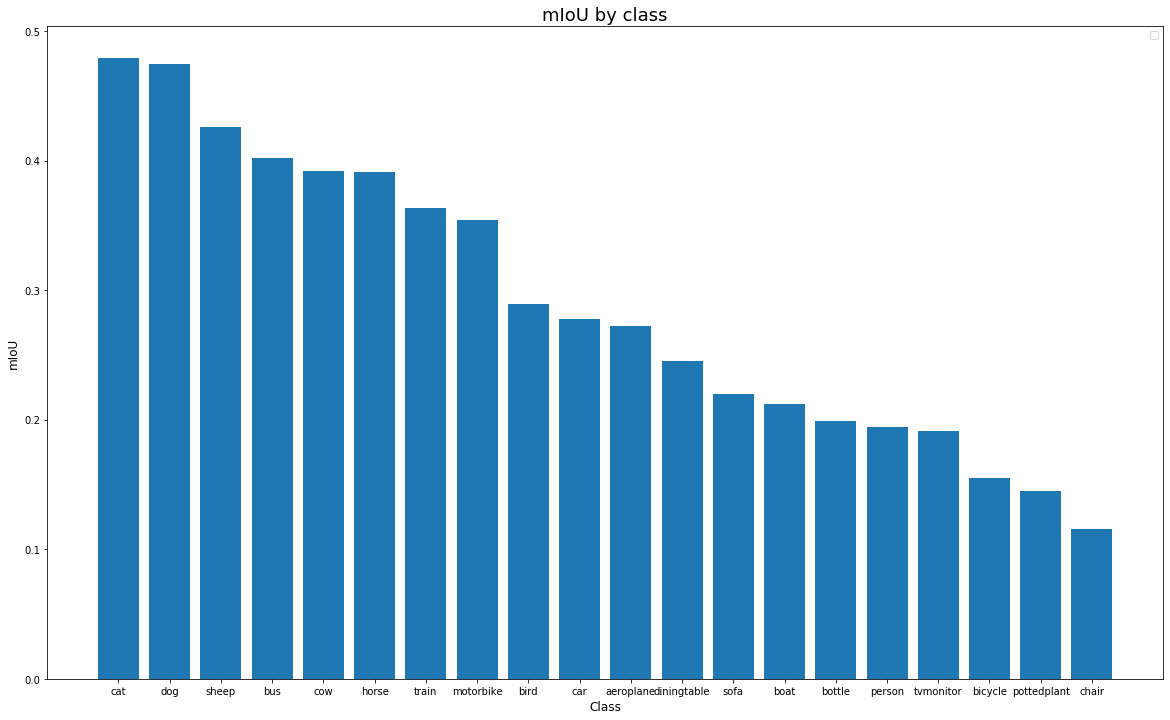

In [7]:
mIoU = df.groupby(['Class']).mean()
mIoU = mIoU.sort_values(by=['IoU'], ascending=False)

fig, ax = plt.subplots()

ax.bar(mIoU.index, mIoU['IoU'])
ax.set_ylabel('mIoU', fontsize = 12)
ax.set_xlabel('Class', fontsize = 12)
ax.set_title('mIoU by class', fontsize = 18)
ax.legend()

plt.show()
fig.savefig("mIoU by class.jpg")